In [2]:
# importing tools for later use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

(array([1.339e+03, 2.679e+03, 2.744e+03, 1.806e+03, 9.250e+02, 3.420e+02,
        1.170e+02, 3.300e+01, 1.300e+01, 1.000e+00, 1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

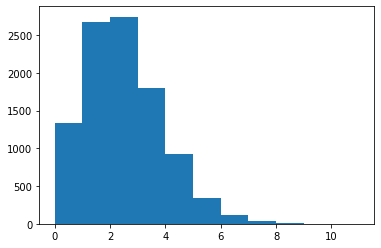

In [3]:
# A bank found that the average number of cars waiting during the noon hour at a drive-up window 
# follows a Poisson distribution with a mean of 2 cars. 
# Make a chart of this distribution and answer these questions concerning the probability of cars 
# waiting at the drive-up window.

# setting n to 10000
# this will be used to declare how many random values to make with .rvs
n = 10000

# creating array with poisson distribution. setting mean to 2.
# using rvs to create 10000 random values that fall within this distribution
x = stats.poisson(2).rvs(n)

# plotting distribution as historgram
plt.hist(x, bins=range(0, 12))



In [4]:
# What is the probability that no cars drive up in the noon hour? (Theoretical)

# creating poisson distribution with mean of 2
# using pmf to find probability that exactly 0 cars drive up
stats.poisson(2).pmf(0)


0.1353352832366127

In [5]:
# What is the probability that no cars drive up in the noon hour? (Simulation)
# drawing samples from poisson distribution
# dimensions are 100,000 row, 1 column (ie. 100,000 simulations of one noon hour each)
cars = np.round(np.random.poisson(2, size = (100_000, 1)))

# checking average of how often 0 cars arrive in a simulation
# matches closely enough with our theoretical answer 
(cars == 0).mean()

0.13646

In [6]:
# What is the probability that 3 or more cars come through the drive through? (Theoretical)

# creating poisson distribution with mean of 2
# using sf to find probability that 3 or more cars appear
# we specify 2 here because sf shows probability of any values greater than
# the specified appearing
(stats.poisson(2).sf(2))

0.32332358381693654

In [7]:
# What is the probability that 3 or more cars come through the drive through? (Simulation)
# drawing samples from poisson distribution
# dimensions are 100,000 row, 1 column (ie. 100,000 simulations of one noon hour each)
cars = np.round(np.random.poisson(2, size = (100_000, 1)))

# checking average of how often 3 or more cars arrive in a simulation
# matches closely enough with our theoretical answer 
(cars >= 3).mean()

0.32457

In [8]:
# How likely is it that the drive through gets at least 1 car? (Theoretical)

# creating poisson distribution with mean of 2
# using sf to find probability that at least 1 car appears
# we specify 0 here because sf shows probability of any values greater than
# the specified appearing. Since we need to know probability of at least 1 appearing, we
# set this to 0
stats.poisson(2).sf(0)


0.8646647167633873

In [9]:
# How likely is it that the drive through gets at least 1 car? (Simulation)

# drawing samples from poisson distribution
# dimensions are 100,000 row, 1 column (ie. 100,000 simulations of one noon hour each)
cars = np.round(np.random.poisson(2, size = (100_000, 1)))

# checking average of how often 0 cars arrive in a simulation
# matches closely enough with our theoretical answer 
(cars > 0).mean()

0.86274

In [10]:
# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:

In [11]:
# What grade point average is required to be in the top 5% of the graduating class? (Theoretical)

# creating variable that holds samples from normal distribution with mean of 3 and sdev of .3
gpa = stats.norm(3, .3)

# using isf to find gpa required to be in the top 5% of class
# isf finds the break value for the percent specified and higher
gpa.isf(.05)


3.4934560880854417

In [12]:
# What grade point average is required to be in the top 5% of the graduating class? (Simulation)

# creating variable that holds samples from normal distribution with mean of 3 and sdev of .3
# 100,000 rows and 1 sample in each row, each value is a gpa
gpas = np.random.normal(3, .3, size=(100_000, 1))

# using percentile to see the break value for the 95th percentile, ie. the top 5 %
# matches closely to our theoretical answer
np.percentile(gpas, 95)

3.4927920785837396

In [13]:
# What GPA constitutes the bottom 15% of the class? (Theoretical)

# creating variable that holds normal distribution with mean of 3 and sdev of .3
gpa = stats.norm(3, .3)

# using ppf to find gpa required to be in the bottom 15% of class
# ppf finds the break value for the percent specified and lower
gpa.ppf(.15)

2.689069983151863

In [14]:
# What GPA constitutes the bottom 15% of the class? (Simulation)

# creating variable that holds samples from normal distribution with mean of 3 and sdev of .3
# 100,000 rows and 1 sample in each row, each value is a gpa
gpas = np.random.normal(3, .3, size=(100_000, 1))

# using percentile to see the break value for the 15th percentile, ie. the bottom 15%
# matches closely to our theoretical answer
np.percentile(gpas, 15)

2.687537939744228

In [15]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. (Theoretical)

# creating variable that holds normal distribution with mean of 3 and sdev of .3
gpa = stats.norm(3, .3)

# using ppf to find the highest gpa that is in the bottom 20% of class
# ppf finds the break value for the percent specified and lower
values_under_third_decile = gpa.ppf(.2)

# using ppf to find the highest gpa that is in the bottom 30% of class
# ppf finds the break value for the percent specified and lower
values_above_third_decile = gpa.ppf(.3)

# the range of the third decile from the bottom of the class is between these values
print(f'The range of the third decile is {values_under_third_decile} to {values_above_third_decile}')


The range of the third decile is 2.7475136299281258 to 2.842679846187588


In [16]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. (Simulation)

# creating variable that holds samples from normal distribution with mean of 3 and sdev of .3
# 100,000 rows and 1 sample in each row, each value is a gpa
gpas = np.random.normal(3, .3, size = (100_000))

# using percentile to find the 20 and 30 percentile values
# values match closely with our theoretical ones
thirty_percentile = np.quantile(gpas, .30)
twenty_percentile = np.percentile(gpas, 20)

# print results
print(f'The range of the third decile is {twenty_percentile} and {thirty_percentile}')


The range of the third decile is 2.7469309038690333 and 2.8424720376637174


In [17]:
# Would a student with a 2.8 grade point average qualify for this scholarship?

# Yes bc they fall within the range of the third decile.

In [18]:
# If I have a GPA of 3.5, what percentile am I in? (Theoretical)

# creating variable that holds normal distribution with mean of 3 and sdev of .3
gpa = stats.norm(3, .3)

# using cdf to find the percentile for a 3.5 gpa
# cdf lets you specify a value and then provides the probability that a random variable takes on a value
# less than or equal to the given point
gpa.cdf(3.5)

0.9522096477271853

In [19]:
# If I have a GPA of 3.5, what percentile am I in? (Simulation)

# creating variable that holds samples from normal distribution with mean of 3 and sdev of .3
# 100,000 rows and 1 sample in each row, each value is a gpa
gpas = np.random.normal(3, .3, size = (100_000))

# creating boolean mask that holds true for any values in gpas the is equal to or greater than 3.5
# using mean to find the percentage of values that meet this criteria (ie. the ones that are true)
# subtracting this percent from 1 to show percentile
# answer is very close to theoretical
1 - (gpas >= 3.5).mean()


0.95122

In [20]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through? (Theoretical)

# using binom distribution because we know how many successes we had after a certain amount of trials
# using sf to determine probability of getting 97 or more click throughs
# we use 96 as the argument since sf shows probability of any value greater than the provided one 
stats.binom(4326, .02).sf(96)

0.1397582363130086

In [21]:
# A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through? (Simulation)

# setting number of trials to 10000
# setting number of visitors per trial to 4326
trials = rows = 10000
visitors_per_trial = cols = 4326

# 0 is a fail, 1 is a success (ie. 0 is no click through, 1 is a clickthrough)
visits = np.random.choice([0, 1], size = (trials, visitors_per_trial), p = [.98, .02])

# converting visits array to DataFrame
visits_df = pd.DataFrame(visits)

# summing each row of 0s and 1s
# creating boolean mask that holds true for any row where there were at least 97 clickthroughs (ie. row sum >= 97)
# finding average amount of simulations that met this criterian
# answer very closely matches theoretical
(visits_df.sum(axis = 1) >= 97).mean()



0.1409

In [22]:
# You are working on some statistics homework consisting of 100 questions (Theoretical)
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

# using binom distribution because we know how many successes we had after a certain amount of trials
# using sf to determine probability of getting at least one answer correct
# we set the chance of success as 1/100 since there are 100 possible answers to any question ie. (0.01 - 1.00) 
# and only one right answer. we specify 60 as the number of trials since we're concerned with getting one right in the first 60
# we use 0 as the argument since sf shows probability of any value greater than the provided one 
# and we need to know the probability of getting at least one right
stats.binom(60, 1/100).sf(0)

0.4528433576092388

In [33]:
# You are working on some statistics homework consisting of 100 questions (Simulation)
# where all of the answers are a probability rounded to the hundreths place. 
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?

# setting number of trials to 10000
# setting number of questions answered to 60
trials = rows = 10000
questions = cols = 60

# 0 is a fail, 1 is a success (ie. 0 is answer is wrong, 1 is answer is right)
answers = np.random.choice([0, 1], size = (trials, questions), p = [.99, .01])

# converting visits array to DataFrame
answers_df = pd.DataFrame(answers)

# summing each row of 0s and 1s
# creating boolean mask that holds true for any row where there were was at least 1 right answer (ie. row sum >= 1)
# finding average amount of simulations that met this criterian
# answer very closely matches theoretical
(answers_df.sum(axis = 1) >= 1).mean()

0.4543

In [24]:
# The codeup staff tends to get upset when the student break area is not cleaned up. (Theoretical)
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

# using binom since we have a set number of trials and we know our probability of success
# using sf(0) which specifies we want to know the probability that we get more than 0 students to clean up
stats.binom(59, .03).sf(0)


0.8342199288437355

In [25]:
# The codeup staff tends to get upset when the student break area is not cleaned up. (Simulation)
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 

# setting number of trials to 10000
# setting number of students in breakroom to 59
trials = rows = 10000
students = cols = 59

# creating array of 0s and 1s where each value represents whether or not a student cleaned the breakroom
# 0 = did not clean, 1 = cleaned
# 59 students per simulation, 10000 simulations
breakroom = np.random.choice([0 , 1], size = (trials, students), p = [.97, .03])

# converting array to dataframe
breakroom_df = pd.DataFrame(breakroom)

# summing the values in each row of dataframe
# creating boolean mask that holds true for any row with a summed value greater than 0 (ie. at least one student cleaned)
# finding percent of simulations that met criteria
# answer closely matches theoretical answer
((breakroom_df.sum(axis = 1)) > 0).mean()



0.828

In [6]:
# How likely is it that it goes two days without getting cleaned up? (Theoretical)

# using binom since we have a set number of trials and we know our probability of success
# using sf(0) which specifies we want to know the probability that we get more than 0 students to clean up
# using 118 as trials number because this is the number of trials that will take place over two days
# the resulting percent is the chance that over the course of two days, at least one student cleans
# we then subtract this from one to reveal the chance the over two days, no one cleans 

1 - (stats.binom(118, .03).sf(0))

# Alternate answer
#(stats.binom(118, .03).cdf(0))

0.027483031992576134

In [27]:
# How likely is it that it goes two days without getting cleaned up? (Simulation)

# setting number of trials to 10000
# setting number of students in breakroom to 118, double the students from last time to represent 2 days worth of students
trials = rows = 10000
students = cols = 118

# creating array of 0s and 1s where each value represents whether or not a student cleaned the breakroom
# 0 = did not clean, 1 = cleaned
# 118 students per simulation, 10000 simulations
breakroom = np.random.choice([0 , 1], size = (trials, students), p = [.97, .03])

# converting array to dataframe
breakroom_df = pd.DataFrame(breakroom)

# summing the values in each row of dataframe
# creating boolean mask that holds true for any row with a summed value of 0 (ie. no student cleaned)
# finding percent of simulations that met criteria
# answer closely matches theoretical answer
((breakroom_df.sum(axis = 1)) == 0).mean()


0.027

In [28]:
# All week? (Theoretical)

# using binom since we have a set number of trials and we know our probability of success
# using sf(0) which specifies we want to know the probability that we get more than 0 students to clean up
# using 413 as trials number because this is the number of trials that will take place over 7 days
# the resulting percent is the chance that over the course of 7 days, at least one student cleans
# we then subtract this from one to reveal the chance the over 7 days, no one cleans 
1 - (stats.binom(295, .03).sf(0))

0.00012521651388086585

In [29]:
# All week? (Simulation)

# setting number of trials to 10000
# setting number of students in breakroom to 295, 5x the students from the original question to represent 5 days worth of students
trials = rows = 10000
students = cols = 295

# creating array of 0s and 1s where each value represents whether or not a student cleaned the breakroom
# 0 = did not clean, 1 = cleaned
# 295 students per simulation, 10000 simulations
breakroom = np.random.choice([0 , 1], size = (trials, students), p = [.97, .03])

# converting array to dataframe
breakroom_df = pd.DataFrame(breakroom)

# summing the values in each row of dataframe
# creating boolean mask that holds true for any row with a summed value of 0 (ie. no student cleaned)
# finding percent of simulations that met criteria
# answer closely matches theoretical answer
((breakroom_df.sum(axis = 1)) == 0).mean()


0.0

In [4]:
# You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime.  (Theoretical)
# After several weeks of careful observation, you notice that the average number of people in line 
# when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

# taking average number of people in line * minutes it take each person to order
# this converts the mean from people to minutes
mean = 15 * 2 

# taking sdev of people in line * minutes it take each person to order
# this converts the sdev from people to minutes
sdev = 3 * 2 

# setting variables equal to the static factors of the problem
# these dont change regardless of how many people are in line
lunchbreak_minutes = 60
minutes_to_get_food = 10
minutes_to_eat = 15

# calculating how much time we can wait in line before begin late by subtracting the time it takes 
# to eat and get our food from our lunch time total
spare_time = lunchbreak_minutes - (minutes_to_get_food + minutes_to_eat)

# calculating probability that our time in line will be less than or equal to the amount of spare time
# we have after accounting for the time it takes to get our food and eat it
stats.norm(mean, sdev).cdf(spare_time)


0.7976716190363569

In [11]:
# Lunchtime Problem (Simulated)

# converting mean from people to minutes via (avg # people in line) * (minutes per person)
mean = 15 * 2

# converting sdev from people to minutes via (sdev # people in line) * (minutes per person)
sdev = 3 * 2 

# setting variables equal to the static factors of the problem
# these dont change regardless of how many people are in line
lunchbreak_minutes = 60
minutes_to_get_food = 10
minutes_to_eat = 15

# calculating how much time we can wait in line before begin late by subtracting the time it takes 
# to eat and get our food from our lunch time total
spare_time = lunchbreak_minutes - (minutes_to_get_food + minutes_to_eat)

# creating array containing 10k random samples from a normal distribution with the prescribed mean and sdev
lunchtime = np.random.normal(mean, sdev, size = 10000)

# creating boolean mask from array that holds true for any values that are equal to or less than spare time we have
# after getting food and eating
(lunchtime <= spare_time).mean()

0.8018

In [35]:
# Connect to the employees database 

# importing host, username, and password from external file
from env import host, username, password
# setting variable equal to string that will combine the host, username, password, and db for our URL
url = (f'mysql+pymysql://{username}:{password}@{host}/employees')

# PART 1 - Connecting to employees database

# using read_sql to run query and url to connect to database
employees = pd.read_sql('SELECT * FROM employees', url)

# converting to Dataframe
emps = pd.DataFrame(employees)

# displaying data frame
emps

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [36]:
# Find the average salary of current employees

# PART 2 - Connecting to salaries table

# using read_sql to run query and url to connect to database
# writing sql code that will filter out any old salaries
salaries = pd.read_sql('SELECT * FROM salaries where to_date > curdate()', url)

# converting to dataframe
sals = pd.DataFrame(salaries)

# displaying data frame
sals

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [37]:
# Find the average salary of current employees

# PART 3 - Merging databases 

# merging dataframes on emp_no to creat one dataframe
empsals = pd.merge(emps, sals, left_on = 'emp_no', right_on='emp_no')

# displaying data frame
empsals

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


In [38]:
# Find the average salary of current employees

# using mean to find average of salary column in empsals data frame
avg_sal = empsals.salary.mean()

# displaying results
avg_sal

72012.23585730705

In [39]:
# Along with the standard deviation. 

sdev_sal = empsals.salary.std()

# displaying results
sdev_sal

17309.99538025198

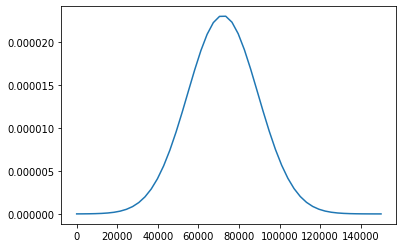

In [40]:
# Model the distribution of employees salaries with a normal distribution and answer the following questions:

# setting x range adequete to show normal distribution shape
x = np.linspace(1, 150000)
# setting y as normal distribution using sdev and mean
y = stats.norm(avg_sal, sdev_sal).pdf(x)

# plotting values
plt.plot(x, y)

In [41]:
# What percent of employees earn less than 60,000?

# using cdf to find percent of employees whose salary is equal to or less than 59999.99 ie, any amount below 60k
stats.norm(avg_sal, sdev_sal).cdf(59999.99)

# verified percent using actual data and found my theoretical value was off by 3%
# len(empsals[empsals.salary <= 60000]) / len(empsals)

0.2438572436502896

In [42]:
# What percent of employees earn more than 95,000?

# using sf to find probability that random value is greater than 95k
stats.norm(avg_sal, sdev_sal).sf(95000)

# verified percent using actual data and was off by 1%
# len(empsals[empsals.salary > 95000]) / len(empsals) 

0.09208819199804053

In [43]:
# What percent of employees earn between 65,000 and 80,000?

# using cdf to find probability that a random value was less than or equal to 64999.99 ie. the amount just under 65k
under_sixtyfive = stats.norm(avg_sal, sdev_sal).cdf(64999.99)
# using sf the find probability that a random value is greater than 80k
over_eigthy = stats.norm(avg_sal, sdev_sal).sf(80000)

# subtracting both of these probabilities from 1 to determine theoretical probability of a random number not being
# within either of their ranges, ie. between 65k and 80k
percent_between_values = 1 - under_sixtyfive - over_eigthy

# displaying results
percent_between_values 

# verified percent using actual data and was 1% off
# over80 = len(empsals[(empsals.salary > 80000)]) 
# under65 = len(empsals[empsals.salary < 65000])
# 1 - ((over80 + under65) / len(empsals))

0.3350607808585214

In [45]:
# What do the top 5% of employees make?

# using isf to find the break point for values in the top 5% 
stats.norm(avg_sal, sdev_sal).isf(.05)

# verified using data
#salaries.salary.quantile(.95)

104225.84999999998